# Inaugural Project - by Josefine, Viktor and Pernille

> **Table of contents** 
> 1. Import and set magics
> 1. Solving questions 1-5
> 1. Conclusion




*Imports and set magics*:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing our own code
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Question 1

We illustrate how the following expression changes with varying alpha and sigma values, assuming that the choice set for the model is discrete i.e. in half hours. $$ \frac{H_F}{H_M} $$  

The expression depicts the relationship for home production between females and males. We solve question 1:

In [12]:
# We define lists for the varying alpha and sigma values
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# We solve the model using the defined lists of values for sigma and alpha
for alpha in alpha_list:    
    for sigma in sigma_list:
        
        # Assigning values to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        opt = model.solve_discrete()

        # Print results
        if opt.HM != 0:
            print(f"alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
        else:
            print(f"alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} (division by zero)")

alpha = 0.25, sigma = 0.50 -> HF/HM = 3.00/5.50 = 0.55
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 1.50/7.00 = 0.21
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 5.50/3.00 = 1.83
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 7.00/1.50 = 4.67


We know that in the model *alpha* represents how productive the female is in the household relative to the male, and *sigma* represents the elasticity of substitution. 

We conclude the following:

- For alpha = 0.5 the male and female are equally productive and sigma has no effect, since there is no gain in substituting between home production performed by the male compared to the female or opposite.
- For alpha > 0.5 the female is more productive, and for wF = wM = 1, the female will work more hours in the household compared to the male. 
- For alpha < 0.5 the female is less productive, and for wF = wM = 1, the female will work less hours in the household compared to the male.
- The higher the value of sigma, the easier it is to substitute between hours worked by the male and female in the home. Thus, if alpha is larger than 0.5 the ratio is larger the higher value sigma has. If alpha is below 0.5 the ratio is lower. This is because the couple would be able to defer more hours worked at home to the more productive member of the couple.

# Question 2

We plot the following logaritmic functions against eachother using varying values for female wage: $$ log\frac{H_F}{H_M} \\\ \\\ log\frac{w_F}{w_M}$$ 

Our model is still based upon the assumption of a discrete choice set. 

We solve question 2:

wF = 0.80 -> HF/HM = 5.00/4.00 = 1.250
wF = 0.90 -> HF/HM = 4.50/4.50 = 1.000
wF = 1.00 -> HF/HM = 4.50/4.50 = 1.000
wF = 1.10 -> HF/HM = 4.00/4.50 = 0.889
wF = 1.20 -> HF/HM = 4.00/5.00 = 0.800


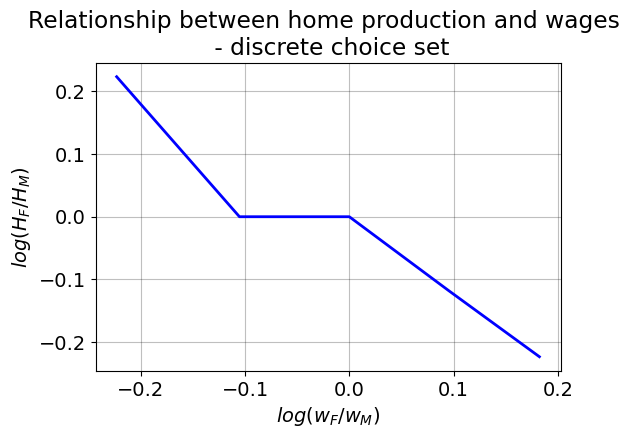

In [8]:
# We define a new model = model2 to overwrite changes made in previous questions
model2 = HouseholdSpecializationModelClass()

# We create empty lists to store values of the logaritmic relationships for wage and home production.
w_log = []
H_log = []

# We create a for-loop 
for wF in model2.par.wF_vec:
        
        # Assigning the value to the female wage
        model2.par.wF = wF

        # Solving the model and saving the results in the lists
        opt = model2.solve_discrete()
        w_log.append(np.log(model2.par.wF/model2.par.wM))
        H_log.append(np.log(opt.HF/opt.HM))

        # Printing the results
        print(f"wF = {wF:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.3f}")

# We plot the results
fig1 = plt.figure(figsize = (6,4))
ax = fig1.add_subplot(1,1,1)

ax.plot(w_log,H_log,ls='-',lw=2,color='blue')

ax.set_xlabel('$ log(w_F/w_M) $')
ax.set_ylabel('$ log(H_F/H_M) $')
ax.set_title('Relationship between home production and wages \n - discrete choice set');


**Figure 1** illustrates that the ratio HF/HM is decreasing in wF/wM. It depicts the relationsship between log of the relative homeproduction and log of relative wages. The plot showcases, that when the wage ratio increases, then the home production performed by the female in the household decreases. This occurs, since it is more optimal for the female to work in the market, since she gets a relatively higher wage.

However, due to the assumption of discrete time, we see that for $w_F = 0.9$ and $w_F = 1.0$ there is no change in the ratio, as the optimal new choice for home production is changed by a smaller amount than is possible when the choice set is discrete. In the following question this minor error is cleared, when we do the same task with an assumption of continous time. 

# Question 3

Now we assume that time is continous rather than discrete. This means that there are infinitely many choice set possibilities. 

Again we plot the following logaritmic functions against each other using varying values for female wage: $$ log\frac{H_F}{H_M} \\\ \\\ log\frac{w_F}{w_M}$$ 

We solve question 3:

wF = 0.80 -> HF/HM = 5.12/4.09 = 1.250
wF = 0.90 -> HF/HM = 4.75/4.27 = 1.111
wF = 1.00 -> HF/HM = 4.45/4.45 = 1.000
wF = 1.10 -> HF/HM = 4.22/4.64 = 0.909
wF = 1.20 -> HF/HM = 4.03/4.83 = 0.833


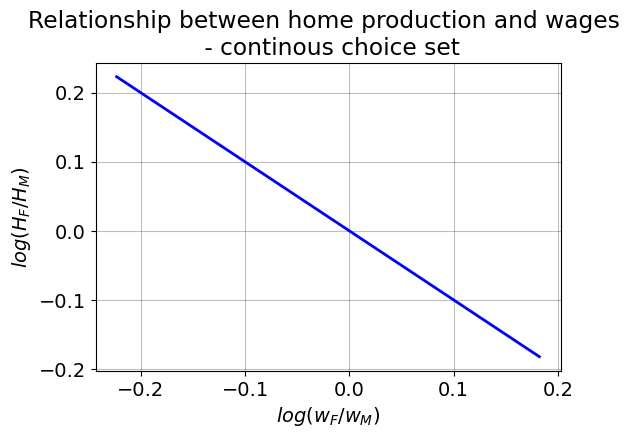

In [16]:
# We define a new model = model3 to overwrite changes made in the previous questions
model3 = HouseholdSpecializationModelClass()

# We create empty lists to store values of the logaritmic relationships for wage and home production.
w_log2 = []
H_log2 = []

# We create a for loop 
for wF in model3.par.wF_vec:    

        # Assigning the value to the female wage
        model3.par.wF = wF

        # Solving the model and saving the results in the lists
        opt = model3.solve()
        w_log2.append(np.log(model3.par.wF/model3.par.wM))
        H_log2.append(np.log(opt.HF/opt.HM))

        # Printing the results
        print(f"wF = {wF:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.3f}")

# We plot the results
fig2 = plt.figure(figsize = (6,4))
ax = fig2.add_subplot(1,1,1)

ax.plot(w_log2,H_log2,ls='-',lw=2,color='blue')

ax.set_xlabel('$ log(w_F/w_M) $')
ax.set_ylabel('$ log(H_F/H_M) $')
ax.set_title('Relationship between home production and wages \n - continous choice set');



**Figure 2** illustrates the same results as in question 2, however due to the introduction of continous time the graph is much smoother. Furthermore, the results are also more precise.  

# Question 4

In Siminski and Yetsenga (2022), *Specialization, Comparative Advantage, and the Sexual Division of Labor*, the following regression is run on time use data of couples:

$$ log\frac{H_F}{H_M} = \beta_0 + \beta_1*log\frac{w_F}{w_M}$$ 

They estimate the beta values to be approximately.: $$ \beta_0 = 0.4 $$ $$ \beta_1 = -0.1 $$

We estimate values of alpha and sigma that gets us closest to the values found in Siminski and Yetsenga (2022). We do this by creating a for-loop that run through different values of sigma and alpha until it reaches the values that minimize the following expression:

 $$ (\beta - \hat{\beta}_{0})^2 + (\beta_1 - \hat{\beta}_{1})^2 $$

In [5]:
# We define a new model = model4 to overwrite changes made in the previous questions
model4 = HouseholdSpecializationModelClass()

# We define the minimum value of the expression as infinite and create an empty list to store the value of alpha and sigma, that minimize the result
min_val = float('inf')
min_args = []

# We create loops to solve the model over varying values of alpha and sigma (ranging from 0 to 1)
for alpha in range(1,101):
    alpha = alpha/100.0    
    for sigma in range(1,101):
        sigma=sigma/100.0

        # We assign the parameter values and define the target values for beta0 and beta1
        model4.par.alpha = alpha
        model4.par.sigma = sigma
        beta0 = 0.4
        beta1 = -0.1

        # We run the regression for the different vector of ratios between home production and wages when the parameters vary
        sol = model4.run_regression()

        # We store the values that minimize the expression
        val = (beta0-model4.sol.beta0)**2+(beta1-model4.sol.beta1)**2
        if val<min_val:
            min_val=val
            min_args=[alpha,sigma]
        elif val==min_val:
            min_args.append(alpha)
            min_args.append(sigma)


# Printing the results
print(min_val)
print(min_args)

/Users/josefinetrangeledpedersen/Desktop/Økonomi/Kandidat/Introduction to programming and numerical analysis/Python/projects-2023-jos-p-og-tex/inauguralproject/inauguralproject.py:78: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/josefinetrangeledpedersen/Desktop/Økonomi/Kandidat/Introduction to programming and numerical analysis/Python/projects-2023-jos-p-og-tex/inauguralproject/inauguralproject.py:81: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)
/Users/josefinetrangeledpedersen/Desktop/Økonomi/Kandidat/Introduction to programming and numerical analysis/Python/projects-2023-jos-p-og-tex/inauguralproject/inauguralproject.py:192: RuntimeWarning: invalid value encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)
/Users/josefinetrangeledpedersen/Desktop/Økonomi/Kandidat/Introduction to programming

0.00011705895386916123
[0.98, 0.1]


We check how the model matches the results from Siminski and Yetsenga (2022), when we set alpha and sigma as the values we find above:

In [6]:
model4.par.alpha=min_args[0]
model4.par.sigma=min_args[1]
sol = model4.run_regression()
print(f"beta0 = {model4.sol.beta0:.2f}, beta 1 = {model4.sol.beta1:.2f}")

beta0 = 0.39, beta 1 = -0.10


We can see that when we set alpha to the value 0.98 and sigma to the value 0.1, the optimal choices for the couple produces vectors of ratios between the home production and wages, that matches the results found by Siminski and Yetsenga (2022). 

This means that the female is very productive at home production relative to the male, and that the elasticity of substitution is relatively low.

# Question 5

As an extension to the model, we add the possibility for the couple to have different preferences for who should work at home, which is independent of the relative wage. 

We thus introduce the parameter k, which is positive if the couple prefers that the woman works at home, whereas the expression below becomes positive if the preferences are met. k is negative if the couple prefers that the man works at home, whereas the expression below becomes positive if the preferences are met. If the couple is indifferent in their preferences, then the expression will be zero and the model will stay as it was. 

The extension to the model is:

$$ +k*\left(\frac{HF}{HM}-\frac{HM}{HF}\right) $$

In [7]:
# We define a new model = model4 to overwrite changes made in the previous questions
model5 = HouseholdSpecializationModelClass()

# we store the results of the optimization to find the value of k to maximize utility in the extended model
result = model5.optimalk()
print(f"k = {model5.par.k:.2f}, \nbeta0 = {model5.sol.beta0:.2f}, \nbeta1 = {model5.sol.beta1:.2f}")

k = -0.00, 
beta0 = -0.03, 
beta1 = -1.00


However, we see that the extension was not able to improve the models fit to the data, since the optimal results yield beta-values that are very far from what they find in Siminski and Yetsenga (2022).

# Conclusion

To sum up, we started by looking at a discrete choice set and found that a higher value of sigma, makes an easier substitution between hours worked at home by females and males. 
Together with alpha, which represents the productivity of females in the household relative to males, we found that for alpha = 0.5, sigma has no effect as both are equally productive. For higher values of alpha the female is more productive and for lower values the female is less productive. 

Furthermore we found a decreasing relationship between relative homeproduction and relative wages. This means that when female wages increase relative to males the homeroduction performed by the female decreases. Do to discrete time we see no change when female wages is 0.9 and 1.0. We adjust this result by introducing continuous time allowing for infinitely many choice sets.
By introducing continuous time we still find a negative relationship between homeproduction and wages, but now with a much smoother and more precise result. 
Hereby improving the model. 

Next we look at a regression on homproduction from Siminski and Yetsenga (2022) and estimate values of alpha and sigma that takes us closest to the results for beta0 and beta1 found in the article. 
Looking at different values for alpha and sigma, we find that alpha = 0.98 and sigma = 0.1 is closest we can get. This gives a very productive female relative to male along with a low elasticity of substitution. 

Lastly we attempt to extend the model by introducing the couples preferences for the distribution of hours spent at home, which is independent of the relative wage. We introduce the parameter k, which is positive if the couple prefers that the woman works at home, whereas the couple gets more utility if the preferences are met. Opposite for men. If the couple is indifferent in their preferences  the model is unchanged. We where not able to improve the model according to the results in Siminski and Yetsenga (2022).